In [1]:
import numpy as np
import pandas as pd
import statistics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from google.colab import drive #digunakan untuk mengakses dan mengelola file yang ada di Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/ML/Nutrisi Bayi.csv')
dataset.head()

,NO,NAMA BALITA,JENIS KELAMIN,UMUR,BERAT(KG),TINGGI (CM),TINGGI(M),TINGGI M2,BMI,STATUS GIZI
0,1,Adhe Fitri,P,24,5.8,65.0,0.650,0.42,13.73,GIZI_KURANG
1,2,Andi Hariati,P,24,5.5,59.0,0.590,0.35,15.80,GIZI_NORMAL
2,3,Anwar Amir,L,28,6.7,71.5,0.715,0.51,13.11,GIZI_KURANG
3,4,Asmar,L,30,8.1,72.5,0.725,0.53,15.41,GIZI_NORMAL
4,5,Eka Andriyani,P,28,6.9,73.0,0.730,0.53,12.95,GIZI_KURANG


In [4]:
dataset.isnull().sum()

NO               0
NAMA BALITA      0
JENIS KELAMIN    0
UMUR             0
BERAT(KG)        0
TINGGI (CM)      0
TINGGI(M)        0
TINGGI M2        0
BMI              0
STATUS GIZI      0
dtype: int64

In [5]:
#menghapus kolom yang tidak dipakai
data1 = dataset.drop(['NAMA BALITA'], 1)

#Menyalin/copy dataframe agar dataframe awal tetap utuh
databaru = data1.copy()

#Membuat objek/instance yang bernama encoder
encoder = LabelEncoder()

#Membuat list dari nama kolom data kategori
categorial_data = ['JENIS KELAMIN']

#Mengubah setiap data kategori menjadi numerik dengan encoder
for kolom in categorial_data:
    databaru[kolom] = encoder.fit_transform(data1[kolom])

databaru.head()

<ipython-input-5-37f1769356af>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data1 = dataset.drop(['NAMA BALITA'], 1)


,NO,JENIS KELAMIN,UMUR,BERAT(KG),TINGGI (CM),TINGGI(M),TINGGI M2,BMI,STATUS GIZI
0,1,1,24,5.8,65.0,0.650,0.42,13.73,GIZI_KURANG
1,2,1,24,5.5,59.0,0.590,0.35,15.80,GIZI_NORMAL
2,3,0,28,6.7,71.5,0.715,0.51,13.11,GIZI_KURANG
3,4,0,30,8.1,72.5,0.725,0.53,15.41,GIZI_NORMAL
4,5,1,28,6.9,73.0,0.730,0.53,12.95,GIZI_KURANG


In [6]:
A=databaru.iloc[:,1:] #mengambil semua data baris dan kolom dimulai dari indeks 1 hingga akhir data pada databaru
X=databaru.iloc[:,1:-1].values #mengambil nilai dari kolom indeks 1 hingga kolom kedua dari akhir data pada databaru
Y=databaru.iloc[:,-1].values #mengambil nilai dari kolom terakhir pada databaru

In [7]:
#Splitting Data
#membagi dataset menjadi 80% data latih dan 20% data uji
X_latih, X_uji, Y_latih, Y_uji = train_test_split(X, Y, test_size=0.2, random_state=1)
print("Seluruh Data : \n", A, "\n")

Seluruh Data : 
      JENIS KELAMIN  UMUR  BERAT(KG)  TINGGI (CM)  TINGGI(M)  TINGGI M2    BMI  \
0                1    24        5.8         65.0      0.650       0.42  13.73   
1                1    24        5.5         59.0      0.590       0.35  15.80   
2                0    28        6.7         71.5      0.715       0.51  13.11   
3                0    30        8.1         72.5      0.725       0.53  15.41   
4                1    28        6.9         73.0      0.730       0.53  12.95   
..             ...   ...        ...          ...        ...        ...    ...   
195              1    36        6.6         64.0      0.640       0.41  16.11   
196              0    38        9.0         76.0      0.760       0.58  15.58   
197              1    42       12.0         75.0      0.750       0.56  21.33   
198              0    44       11.0         74.0      0.740       0.55  20.09   
199              0    47       10.0         73.0      0.730       0.53  18.77   

     STATU

In [8]:
# Normalisasi data latih
scaler = MinMaxScaler()
X_latih_normalized = scaler.fit_transform(X_latih)
print("Data X latih sebelum normalisasi: \n",X_latih, "\n")
print("Data X latih normalisasi: \n",X_latih_normalized, "\n")

Data X latih sebelum normalisasi: 
 [[ 0.   47.   10.   ...  0.53  0.28 35.6 ]
 [ 1.   45.   12.   ...  0.58  0.34 35.67]
 [ 1.   33.    4.8  ...  0.66  0.44 11.02]
 ...
 [ 0.   29.    6.6  ...  0.54  0.29 22.63]
 [ 0.   34.   12.   ...  0.76  0.58 20.78]
 [ 0.   32.   10.   ...  0.85  0.72 13.84]] 

Data X latih normalisasi: 
 [[0.         0.86       0.61904762 ... 0.08163265 0.05555556 0.84966753]
 [1.         0.82       0.80952381 ... 0.18367347 0.13888889 0.85169124]
 [1.         0.58       0.12380952 ... 0.34693878 0.27777778 0.13905753]
 ...
 [0.         0.5        0.2952381  ... 0.10204082 0.06944444 0.47470367]
 [0.         0.6        0.80952381 ... 0.55102041 0.47222222 0.42122001]
 [0.         0.56       0.61904762 ... 0.73469388 0.66666667 0.22058398]] 



In [9]:
# Normalisasi Data Uji
X_uji_normalized = scaler.transform(X_uji)
print("Data X uji normalisasi: \n",X_uji, "\n")
print("Data X latih normalisasi: \n",X_uji_normalized, "\n")

Data X uji normalisasi: 
 [[ 0.   34.   12.   89.    0.89  0.79 15.15]
 [ 0.   23.   13.   88.    0.88  0.77 16.79]
 [ 0.   21.    5.8  82.    0.82  0.67  8.63]
 [ 0.   34.    7.7  78.    0.78  0.61 12.66]
 [ 0.   44.    1.   76.    0.76  0.58  1.73]
 [ 0.   44.   11.   74.    0.74  0.55 20.09]
 [ 1.   37.   10.   65.    0.65  0.42 23.67]
 [ 1.   28.    6.9  73.    0.73  0.53 12.95]
 [ 1.   23.   13.   78.    0.78  0.61 21.37]
 [ 0.   33.    6.7  67.    0.67  0.45 14.93]
 [ 1.   32.   12.   56.    0.56  0.31 38.27]
 [ 1.   24.    9.4  75.    0.75  0.56 16.71]
 [ 1.   32.    9.4  61.    0.61  0.37 25.26]
 [ 0.   34.    5.8  76.    0.76  0.58 10.04]
 [ 0.   44.    8.   65.    0.65  0.42 18.93]
 [ 1.   36.    7.5  78.    0.78  0.61 12.33]
 [ 0.   37.   13.   89.    0.89  0.79 16.41]
 [ 1.   22.    8.8  83.    0.83  0.69 12.77]
 [ 1.   39.    9.4  86.    0.86  0.74 12.71]
 [ 1.   23.   11.   91.    0.91  0.83 13.28]
 [ 0.   34.    7.8  73.    0.73  0.53 14.64]
 [ 0.   31.   12.8  72.    0.

In [10]:
knn_classifier = KNeighborsClassifier(n_neighbors=2)

# Training KNN dengan data yang sudah di normalisasi
knn_classifier.fit(X_latih_normalized, Y_latih)

KNeighborsClassifier(n_neighbors=2)

In [11]:
# Making predictions on normalized testing data
predictions = knn_classifier.predict(X_uji_normalized)

In [12]:
# Menghitung prediksi benar dan prediksi salah
prediksiBenar = np.sum(predictions == Y_uji)
prediksiSalah = np.sum(predictions != Y_uji)

print("Prediksi Benar : {} data".format(prediksiBenar))
print("Prediksi Salah : {} data".format(prediksiSalah))

Prediksi Benar : 33 data
Prediksi Salah : 7 data


In [13]:
predictions = knn_classifier.predict(X_uji_normalized)
cm = confusion_matrix(Y_uji, predictions)
cm

array([[ 4,  0,  0,  0],
       [ 1, 12,  0,  0],
       [ 0,  0,  7,  1],
       [ 0,  4,  1, 10]])

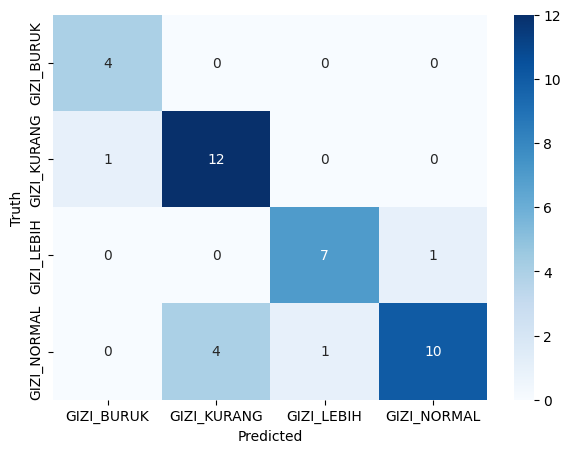

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['GIZI_BURUK', 'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_NORMAL'], yticklabels=['GIZI_BURUK', 'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_NORMAL'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [15]:
print(classification_report(Y_uji, predictions))

              precision    recall  f1-score   support

  GIZI_BURUK       0.80      1.00      0.89         4
 GIZI_KURANG       0.75      0.92      0.83        13
  GIZI_LEBIH       0.88      0.88      0.88         8
 GIZI_NORMAL       0.91      0.67      0.77        15

    accuracy                           0.82        40
   macro avg       0.83      0.87      0.84        40
weighted avg       0.84      0.82      0.82        40

